### Which MOEA is the Best ?

Algorithms to be considered
* SPEA 2
* NSGA 2
* RNSGA2
* MOEA/D (Chebychev , Weighted sum , Penalty Boundary Intersection)
* NSGA 3

Literature Review:
* papers on all these algorithms (Foundational Papers)
* Test Problems Definitions 
* Evaluation Metrics (Strongly Pareto Compliant and Weakly Pareto Compliant)

In [1]:
from pymoo.util.function_loader import is_compiled;print('Compiled Extensions: ', is_compiled())
import numpy as np
from pymoo.util.plotting import plot

Compiled Extensions:  True


In [2]:
from pymoo.algorithms.moo.spea2 import SPEA2
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.problems.multi.zdt import ZDT3
from pymoo.optimize import minimize
from pymoo.indicators.hv import HV


In [3]:
# Hypervolume of pareto front of problem for n_vars = 2,3,5,10
problem_2 = ZDT3()
original_pareto_front_2 = problem_2.pareto_front()
objective_nvar2_1 = [i[0] for i in original_pareto_front_2]
objective_nvar2_2 = [i[1] for i in original_pareto_front_2]
ref_vector_2 = [max(objective_nvar2_1),max(objective_nvar2_2)]
ind = HV(ref_point=ref_vector_2)
Hypervolume_nvar2 = ind(original_pareto_front_2)


problem_3 = ZDT3()
original_pareto_front_3 = problem_3.pareto_front()
objective_nvar3_1 = [i[0] for i in original_pareto_front_3]
objective_nvar3_2 = [i[1] for i in original_pareto_front_3]
ref_vector_3 = [max(objective_nvar3_1),max(objective_nvar3_2)]
ind = HV(ref_point=ref_vector_3)
Hypervolume_nvar3 = ind(original_pareto_front_3)


problem_5 = ZDT3()
original_pareto_front_5 = problem_5.pareto_front()
objective_nvar5_1 = [i[0] for i in original_pareto_front_5]
objective_nvar5_2 = [i[1] for i in original_pareto_front_5]
ref_vector_5 = [max(objective_nvar5_1),max(objective_nvar5_2)]
ind = HV(ref_point=ref_vector_5)
Hypervolume_nvar5 = ind(original_pareto_front_5)

problem_10 = ZDT3()
original_pareto_front_10 = problem_10.pareto_front()
objective_nvar10_1 = [i[0] for i in original_pareto_front_10]
objective_nvar10_2 = [i[1] for i in original_pareto_front_10]
ref_vector_10 = [max(objective_nvar10_1),max(objective_nvar10_2)]
ind = HV(ref_point=ref_vector_10)
Hypervolume_nvar10 = ind(original_pareto_front_10)

#### SPEA2

In [4]:
model_list = []
problem = ZDT3()
algorithm = SPEA2(pop_size=100)
for i in range(5):
    model_list.append(minimize(problem,
                algorithm,
                ('n_gen', 100),
                save_history = True,
                verbose=True))

n_gen  |  n_eval  | n_nds  |      igd      |       gd      |       hv      |    gd_plus    |    igd_plus  
     1 |      100 |     11 |  1.2008105008 |  1.6459901614 |  0.000000E+00 |  2.7395048730 |  1.8928562348
     2 |      200 |     12 |  1.1915265678 |  1.4410431304 |  0.000000E+00 |  2.3900894246 |  1.8928562348
     3 |      300 |     10 |  1.0017314485 |  1.1686485179 |  0.000000E+00 |  1.9030820760 |  1.5606478505
     4 |      400 |     14 |  0.8205702396 |  1.0479143176 |  0.0000384257 |  1.6803086763 |  1.1485988569
     5 |      500 |     12 |  0.7639243275 |  0.8831538448 |  0.0000384257 |  1.4121065819 |  1.1446765563
     6 |      600 |     16 |  0.5906064389 |  0.7945063829 |  0.0052529672 |  1.2316350609 |  0.7664640260
     7 |      700 |     17 |  0.5196990081 |  0.6172962010 |  0.0186068464 |  0.9389506159 |  0.7114162756
     8 |      800 |     16 |  0.4493736868 |  0.4913536783 |  0.0840135486 |  0.7404414959 |  0.6384570424
     9 |      900 |     14 |  0.36794

In [5]:
data_hv_per_gen = []
data_gd_per_gen = []
data_igd_per_gen = []
data_gdpl_per_gen = []
data_igdpl_per_gen = []
for i in model_list:
    data_1 = []
    data_2 = []
    data_3 = []
    data_4 = []
    data_5 = []
    for j in range(100):
        data_1.append(i.history[j].output.hv.value)
        data_2.append(i.history[j].output.gd.value)
        data_3.append(i.history[j].output.igd.value)
        data_4.append(i.history[j].output.gd_plus.value)
        data_5.append(i.history[j].output.igd_plus.value)
    
    data_hv_per_gen.append(data_1)
    data_gd_per_gen.append(data_2)
    data_igd_per_gen.append(data_3)
    data_gdpl_per_gen.append(data_4)
    data_igdpl_per_gen.append(data_5)

data_avg_hyp_improvement = [sum(num) for num in zip(*data_hv_per_gen)]
data_avg_gd_improvement = [sum(num) for num in zip(*data_gd_per_gen)]
data_avg_igd_improvement = [sum(num) for num in zip(*data_igd_per_gen)]
data_avg_gdplus_improvement =[sum(num) for num in zip(*data_gdpl_per_gen)]
data_avg_igdplus_improvement = [sum(num) for num in zip(*data_igdpl_per_gen)]


data_avg_hyp_improvement = [i/5 for i in data_avg_hyp_improvement ]
data_avg_gd_improvement = [i/5 for i in data_avg_gd_improvement ]
data_avg_igd_improvement = [i/5 for i in data_avg_igd_improvement ]
data_avg_gdplus_improvement =[i/5 for i in data_avg_gdplus_improvement ]
data_avg_igdplus_improvement = [i/5 for i in data_avg_igdplus_improvement ]
data_avg_hyp_percent_improvement = [i/Hypervolume_nvar2 for i in data_avg_hyp_improvement ]





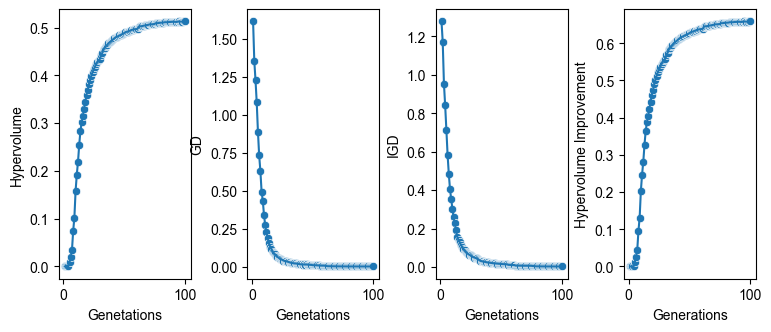

Max values of Hypervolume is 0.513044304619371 
 , Best value of GD is 0.0037566781194900713 
 , Best value of IGD is 
 0.003636633141774973 Best value of GD+ is 0.002002376291383611 , Best value of IGD+ is 0.0024774063458442657


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
plt.rcParams["figure.figsize"] = [9.00, 3.50]
#plt.rcParams["figure.autolayout"] = True
fig,axes = plt.subplots(1,4)
#fig.suptitle('Performance Plot with n_var=2')
sns.set_theme(style="darkgrid")
fig.subplots_adjust(hspace=0.725, wspace=0.425)
sns.scatterplot(x=list(range(1,101)),y=data_avg_hyp_improvement,ax=axes[0])
sns.lineplot(x=list(range(1,101)),y=data_avg_hyp_improvement,ax=axes[0])
axes[0].set(xlabel='Genetations',ylabel='Hypervolume')

sns.scatterplot(x=list(range(1,101)),y=data_avg_gd_improvement,ax=axes[1])
sns.lineplot(x=list(range(1,101)),y=data_avg_gd_improvement,ax=axes[1])
axes[1].set(xlabel='Genetations',ylabel='GD')

sns.scatterplot(x=list(range(1,101)),y=data_avg_igd_improvement,ax=axes[2])
sns.lineplot(x=list(range(1,101)),y=data_avg_igd_improvement,ax=axes[2])
axes[2].set(xlabel='Genetations',ylabel='IGD')

sns.scatterplot(x=list(range(1,101)),y=data_avg_hyp_percent_improvement,ax=axes[3])
sns.lineplot(x=list(range(1,101)),y=data_avg_hyp_percent_improvement,ax=axes[3])
axes[3].set(xlabel='Generations',ylabel='Hypervolume Improvement')



plt.show()
print('Max values of Hypervolume is {0} \n , Best value of GD is {1} \n , Best value of IGD is \n {2} Best value of GD+ is {3} , Best value of IGD+ is {4}'.format(max(data_avg_hyp_improvement),min(data_avg_gd_improvement),min(data_avg_igd_improvement),min(data_avg_gdplus_improvement),min(data_avg_igdplus_improvement)))

[Text(0.5, 0, 'Genetations'), Text(0, 0.5, 'IGD Plus')]

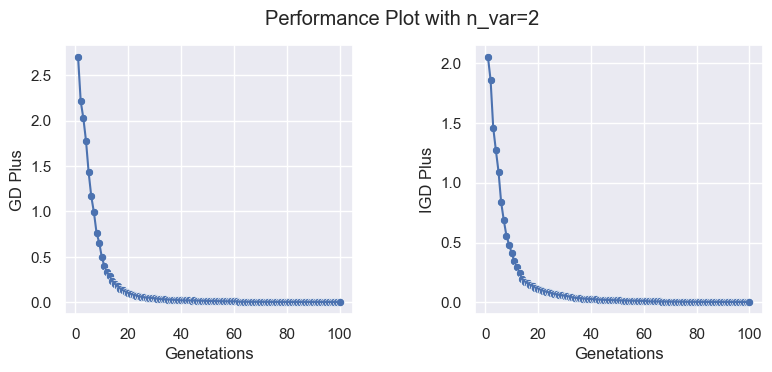

In [7]:
plt.rcParams["figure.figsize"] = [9.00, 3.50]
#plt.rcParams["figure.autolayout"] = True
fig,axes = plt.subplots(1,2)
#fig.suptitle('Performance Plot with n_var=2')
sns.set_theme(style="darkgrid")
fig.subplots_adjust(hspace=0.425, wspace=0.425)
fig.suptitle('Performance Plot with n_var=2')
sns.scatterplot(x=list(range(1,101)),y=data_avg_gdplus_improvement,ax=axes[0])
sns.lineplot(x=list(range(1,101)),y=data_avg_gdplus_improvement,ax=axes[0])
axes[0].set(xlabel='Genetations',ylabel='GD Plus')

sns.scatterplot(x=list(range(1,101)),y=data_avg_igdplus_improvement,ax=axes[1])
sns.lineplot(x=list(range(1,101)),y=data_avg_igdplus_improvement,ax=axes[1])
axes[1].set(xlabel='Genetations',ylabel='IGD Plus')



Text(0, 0.5, 'Objective 2')

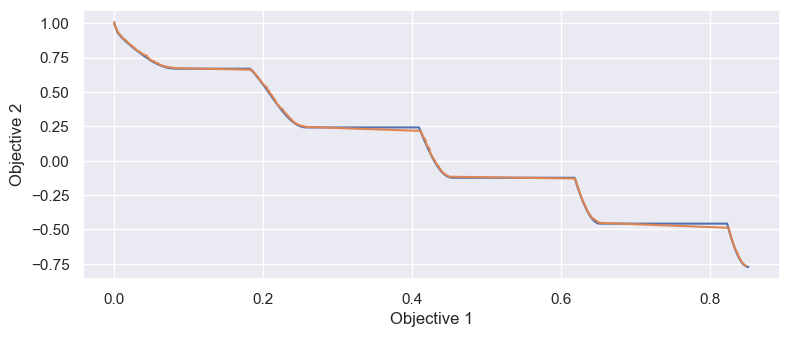

In [8]:
problem = ZDT3()
original_pareto_front = problem.pareto_front()
original_objective_1 = [i[0] for i in original_pareto_front]
original_objective_2 = [i[1] for i in original_pareto_front]
optimized_result = model_list[0]
optimized_objectives  = optimized_result.F
optimized_objective_1 = [i[0] for i in optimized_objectives]
optimized_objective_2 = [i[1] for i in optimized_objectives]
sns.lineplot(x=original_objective_1,y=original_objective_2)
sns.lineplot(x=optimized_objective_1,y=optimized_objective_2)
plt.xlabel("Objective 1")
plt.ylabel("Objective 2")

#### NSGA2

n_gen  |  n_eval  | n_nds  |      igd      |       gd      |       hv      |    gd_plus    |    igd_plus  
     1 |      100 |     15 |  1.3046483561 |  1.5301910684 |  0.000000E+00 |  2.4702757112 |  2.0831435338
     2 |      200 |     14 |  1.1732282301 |  1.5839299556 |  0.000000E+00 |  2.6447222316 |  1.8492926930
     3 |      300 |      8 |  0.7682114387 |  1.4199468654 |  0.0019023847 |  2.3862579716 |  1.0089558811
     4 |      400 |     11 |  0.7014058244 |  1.1652929281 |  0.0031340151 |  1.9507705767 |  0.9231886838
     5 |      500 |     10 |  0.5994618317 |  1.0149545681 |  0.0049391590 |  1.6244457731 |  0.8077305121
     6 |      600 |     10 |  0.5345265548 |  0.6999861453 |  0.0058738016 |  1.1313379725 |  0.7192470440
     7 |      700 |     13 |  0.5121888499 |  0.6197808588 |  0.0058738016 |  0.9492116415 |  0.7131015036
     8 |      800 |     20 |  0.4374300453 |  0.5764126457 |  0.0135488174 |  0.8615323661 |  0.5562952503
     9 |      900 |     18 |  0.35885

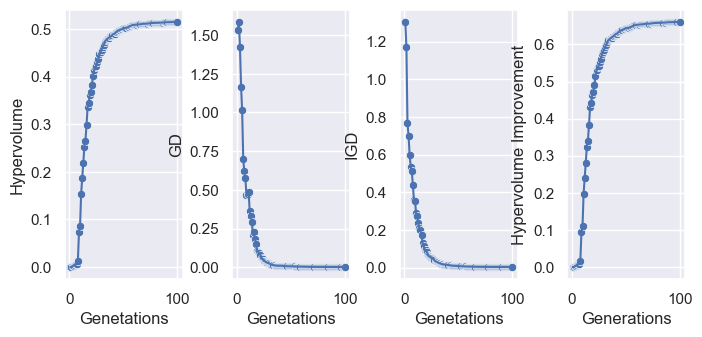

Max values of Hypervolume is 0.514576497549966 
 , Best value of GD is 0.003046048797675294 
 , Best value of IGD is 
 0.0029708129718329025 Best value of GD+ is 0.0014273337919760848 , Best value of IGD+ is 0.0017799512643294692


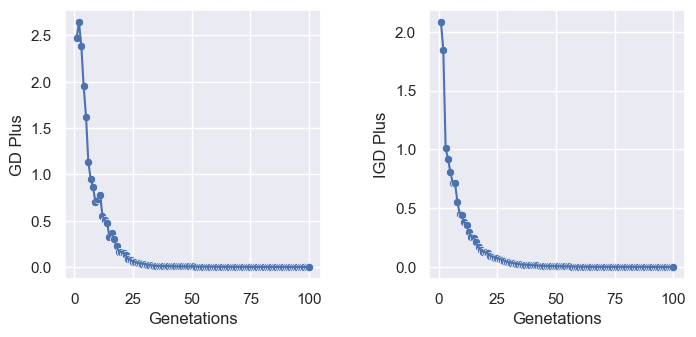

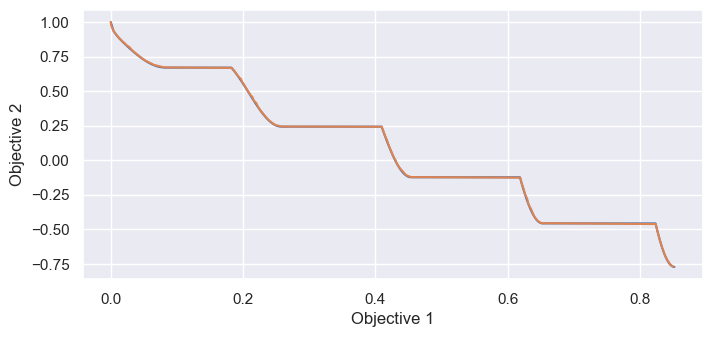

In [9]:
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.optimize import minimize
model_list_nsga2 = []
problem = ZDT3()
algorithm = NSGA2(pop_size=100)
for i in range(5):
    model_list_nsga2.append(minimize(problem,
               algorithm,
               ('n_gen', 100),
               seed=1,
               save_history = True,
               verbose=True))
data_hv_per_gen = []
data_gd_per_gen = []
data_igd_per_gen = []
data_gdpl_per_gen = []
data_igdpl_per_gen = []
for i in model_list_nsga2:
    data_1 = []
    data_2 = []
    data_3 = []
    data_4 = []
    data_5 = []
    for j in range(100):
        data_1.append(i.history[j].output.hv.value)
        data_2.append(i.history[j].output.gd.value)
        data_3.append(i.history[j].output.igd.value)
        data_4.append(i.history[j].output.gd_plus.value)
        data_5.append(i.history[j].output.igd_plus.value)
    
    data_hv_per_gen.append(data_1)
    data_gd_per_gen.append(data_2)
    data_igd_per_gen.append(data_3)
    data_gdpl_per_gen.append(data_4)
    data_igdpl_per_gen.append(data_5)

data_avg_hyp_improvement = [sum(num) for num in zip(*data_hv_per_gen)]
data_avg_gd_improvement = [sum(num) for num in zip(*data_gd_per_gen)]
data_avg_igd_improvement = [sum(num) for num in zip(*data_igd_per_gen)]
data_avg_gdplus_improvement =[sum(num) for num in zip(*data_gdpl_per_gen)]
data_avg_igdplus_improvement = [sum(num) for num in zip(*data_igdpl_per_gen)]


data_avg_hyp_improvement = [i/5 for i in data_avg_hyp_improvement ]
data_avg_gd_improvement = [i/5 for i in data_avg_gd_improvement ]
data_avg_igd_improvement = [i/5 for i in data_avg_igd_improvement ]
data_avg_gdplus_improvement =[i/5 for i in data_avg_gdplus_improvement ]
data_avg_igdplus_improvement = [i/5 for i in data_avg_igdplus_improvement ]
data_avg_hyp_percent_improvement = [i/Hypervolume_nvar5 for i in data_avg_hyp_improvement ]





import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = [8.00, 3.50]
#plt.rcParams["figure.autolayout"] = True
fig,axes = plt.subplots(1,4)
#fig.suptitle('Performance Plot with n_var=5')
sns.set_theme(style="darkgrid")
fig.subplots_adjust(hspace=0.725, wspace=0.425)
sns.scatterplot(x=list(range(1,101)),y=data_avg_hyp_improvement,ax=axes[0])
sns.lineplot(x=list(range(1,101)),y=data_avg_hyp_improvement,ax=axes[0])
axes[0].set(xlabel='Genetations',ylabel='Hypervolume')

sns.scatterplot(x=list(range(1,101)),y=data_avg_gd_improvement,ax=axes[1])
sns.lineplot(x=list(range(1,101)),y=data_avg_gd_improvement,ax=axes[1])
axes[1].set(xlabel='Genetations',ylabel='GD')

sns.scatterplot(x=list(range(1,101)),y=data_avg_igd_improvement,ax=axes[2])
sns.lineplot(x=list(range(1,101)),y=data_avg_igd_improvement,ax=axes[2])
axes[2].set(xlabel='Genetations',ylabel='IGD')

sns.scatterplot(x=list(range(1,101)),y=data_avg_hyp_percent_improvement,ax=axes[3])
sns.lineplot(x=list(range(1,101)),y=data_avg_hyp_percent_improvement,ax=axes[3])
axes[3].set(xlabel='Generations',ylabel='Hypervolume Improvement')


plt.show()
print('Max values of Hypervolume is {0} \n , Best value of GD is {1} \n , Best value of IGD is \n {2} Best value of GD+ is {3} , Best value of IGD+ is {4}'.format(max(data_avg_hyp_improvement),min(data_avg_gd_improvement),min(data_avg_igd_improvement),min(data_avg_gdplus_improvement),min(data_avg_igdplus_improvement)))
plt.rcParams["figure.figsize"] = [8.00, 3.50]
#plt.rcParams["figure.autolayout"] = True
fig,axes = plt.subplots(1,2)
#fig.suptitle('Performance Plot with n_var=5')
sns.set_theme(style="darkgrid")
fig.subplots_adjust(hspace=0.425, wspace=0.425)


sns.scatterplot(x=list(range(1,101)),y=data_avg_gdplus_improvement,ax=axes[0])
sns.lineplot(x=list(range(1,101)),y=data_avg_gdplus_improvement,ax=axes[0])
axes[0].set(xlabel='Genetations',ylabel='GD Plus')

sns.scatterplot(x=list(range(1,101)),y=data_avg_igdplus_improvement,ax=axes[1])
sns.lineplot(x=list(range(1,101)),y=data_avg_igdplus_improvement,ax=axes[1])
axes[1].set(xlabel='Genetations',ylabel='IGD Plus')
plt.show()


problem = ZDT3()
original_pareto_front = problem.pareto_front()
original_objective_1 = [i[0] for i in original_pareto_front]
original_objective_2 = [i[1] for i in original_pareto_front]
optimized_result = model_list_nsga2[0]
optimized_objectives  = optimized_result.F
optimized_objective_1 = [i[0] for i in optimized_objectives]
optimized_objective_2 = [i[1] for i in optimized_objectives]
sns.lineplot(x=original_objective_1,y=original_objective_2)
sns.lineplot(x=optimized_objective_1,y=optimized_objective_2)
plt.xlabel("Objective 1")
plt.ylabel("Objective 2")
plt.show()

#### MOEAD

n_gen  |  n_eval  | n_nds  |      igd      |       gd      |       hv      |    gd_plus    |    igd_plus  
     1 |      100 |      9 |  1.2923245391 |  1.4330662744 |  0.000000E+00 |  2.3858532784 |  2.1334530067
     2 |      200 |     29 |  0.9540347590 |  0.9001057354 |  0.000000E+00 |  1.4860269749 |  1.4012114466
     3 |      300 |     26 |  0.9153636271 |  0.7662394306 |  0.000000E+00 |  1.0608212807 |  1.3860961243
     4 |      400 |     45 |  0.6775525358 |  0.5121000143 |  0.0030574122 |  0.8049749711 |  1.0120699506
     5 |      500 |     33 |  0.6012046963 |  0.4408404783 |  0.0068201886 |  0.6507701204 |  0.8829604613
     6 |      600 |     67 |  0.6071474068 |  0.4808350199 |  0.0057026973 |  0.6554410373 |  0.9157817692
     7 |      700 |     85 |  0.4961709538 |  0.4258823620 |  0.0132259927 |  0.5287212367 |  0.7131975727
     8 |      800 |     39 |  0.4581053585 |  0.4132669818 |  0.0148972606 |  0.5569998040 |  0.6576766277
     9 |      900 |     60 |  0.43884

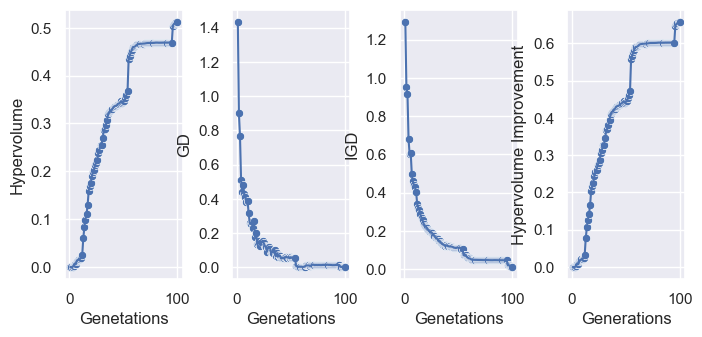

Max values of Hypervolume is 0.5120915863578157 
 , Best value of GD is 0.0024763835925268886 
 , Best value of IGD is 
 0.010398341207434967 Best value of GD+ is 0.0009084279422586977 , Best value of IGD+ is 0.0036339908055622165


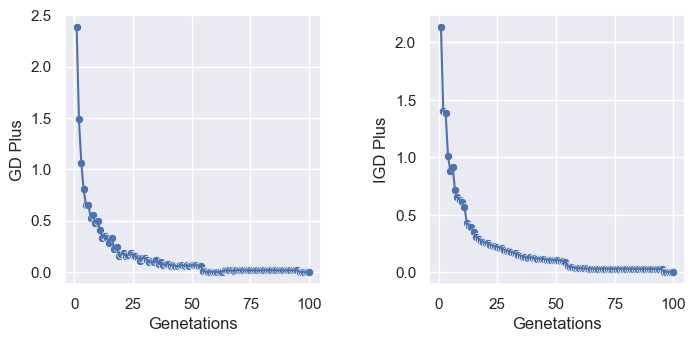

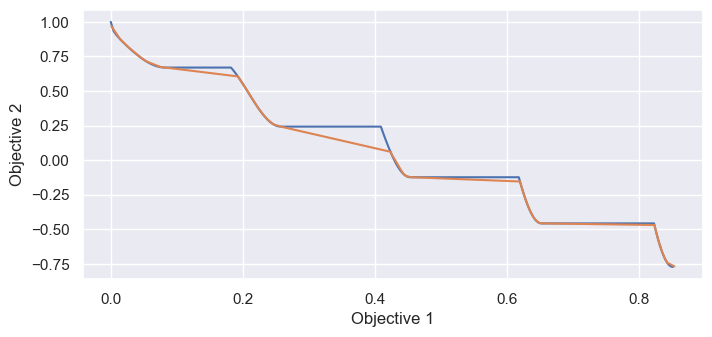

In [10]:
from pymoo.algorithms.moo.moead import MOEAD
from pymoo.util.ref_dirs import get_reference_directions
from pymoo.optimize import minimize
model_list_moead = []
problem = ZDT3()
ref_dirs = get_reference_directions('energy',2,100,seed=1)
algorithm = MOEAD(ref_dirs=ref_dirs , n_neighbours=15)
for i in range(5):
    model_list_moead.append(minimize(problem,
               algorithm,
               ('n_gen', 100),
               seed=2,
               save_history = True,
               verbose=True))
data_hv_per_gen = []
data_gd_per_gen = []
data_igd_per_gen = []
data_gdpl_per_gen = []
data_igdpl_per_gen = []
for i in model_list_moead:
    data_1 = []
    data_2 = []
    data_3 = []
    data_4 = []
    data_5 = []
    for j in range(100):
        data_1.append(i.history[j].output.hv.value)
        data_2.append(i.history[j].output.gd.value)
        data_3.append(i.history[j].output.igd.value)
        data_4.append(i.history[j].output.gd_plus.value)
        data_5.append(i.history[j].output.igd_plus.value)
    
    data_hv_per_gen.append(data_1)
    data_gd_per_gen.append(data_2)
    data_igd_per_gen.append(data_3)
    data_gdpl_per_gen.append(data_4)
    data_igdpl_per_gen.append(data_5)

data_avg_hyp_improvement = [sum(num) for num in zip(*data_hv_per_gen)]
data_avg_gd_improvement = [sum(num) for num in zip(*data_gd_per_gen)]
data_avg_igd_improvement = [sum(num) for num in zip(*data_igd_per_gen)]
data_avg_gdplus_improvement =[sum(num) for num in zip(*data_gdpl_per_gen)]
data_avg_igdplus_improvement = [sum(num) for num in zip(*data_igdpl_per_gen)]


data_avg_hyp_improvement = [i/5 for i in data_avg_hyp_improvement ]
data_avg_gd_improvement = [i/5 for i in data_avg_gd_improvement ]
data_avg_igd_improvement = [i/5 for i in data_avg_igd_improvement ]
data_avg_gdplus_improvement =[i/5 for i in data_avg_gdplus_improvement ]
data_avg_igdplus_improvement = [i/5 for i in data_avg_igdplus_improvement ]
data_avg_hyp_percent_improvement = [i/Hypervolume_nvar3 for i in data_avg_hyp_improvement ]


import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = [8.00, 3.50]
#plt.rcParams["figure.autolayout"] = True
fig,axes = plt.subplots(1,4)
sns.set_theme(style="darkgrid")
#fig.suptitle('Performance Plot with n_var=3')
fig.subplots_adjust(hspace=0.725, wspace=0.425)
sns.scatterplot(x=list(range(1,101)),y=data_avg_hyp_improvement,ax=axes[0])
sns.lineplot(x=list(range(1,101)),y=data_avg_hyp_improvement,ax=axes[0])
axes[0].set(xlabel='Genetations',ylabel='Hypervolume')

sns.scatterplot(x=list(range(1,101)),y=data_avg_gd_improvement,ax=axes[1])
sns.lineplot(x=list(range(1,101)),y=data_avg_gd_improvement,ax=axes[1])
axes[1].set(xlabel='Genetations',ylabel='GD')

sns.scatterplot(x=list(range(1,101)),y=data_avg_igd_improvement,ax=axes[2])
sns.lineplot(x=list(range(1,101)),y=data_avg_igd_improvement,ax=axes[2])
axes[2].set(xlabel='Genetations',ylabel='IGD')

sns.scatterplot(x=list(range(1,101)),y=data_avg_hyp_percent_improvement,ax=axes[3])
sns.lineplot(x=list(range(1,101)),y=data_avg_hyp_percent_improvement,ax=axes[3])
axes[3].set(xlabel='Generations',ylabel='Hypervolume Improvement')

plt.show()
print('Max values of Hypervolume is {0} \n , Best value of GD is {1} \n , Best value of IGD is \n {2} Best value of GD+ is {3} , Best value of IGD+ is {4}'.format(max(data_avg_hyp_improvement),min(data_avg_gd_improvement),min(data_avg_igd_improvement),min(data_avg_gdplus_improvement),min(data_avg_igdplus_improvement)))
plt.rcParams["figure.figsize"] = [8.00, 3.50]
#plt.rcParams["figure.autolayout"] = True
fig,axes = plt.subplots(1,2)

sns.set_theme(style="darkgrid")
fig.subplots_adjust(hspace=0.425, wspace=0.425)
#fig.suptitle('Performance Plot with n_var=3')
sns.scatterplot(x=list(range(1,101)),y=data_avg_gdplus_improvement,ax=axes[0])
sns.lineplot(x=list(range(1,101)),y=data_avg_gdplus_improvement,ax=axes[0])
axes[0].set(xlabel='Genetations',ylabel='GD Plus')

sns.scatterplot(x=list(range(1,101)),y=data_avg_igdplus_improvement,ax=axes[1])
sns.lineplot(x=list(range(1,101)),y=data_avg_igdplus_improvement,ax=axes[1])
axes[1].set(xlabel='Genetations',ylabel='IGD Plus')
plt.show()


problem = ZDT3()
original_pareto_front = problem.pareto_front()
original_objective_1 = [i[0] for i in original_pareto_front]
original_objective_2 = [i[1] for i in original_pareto_front]
optimized_result = model_list_moead[0]
optimized_objectives  = optimized_result.F
optimized_objective_1 = [i[0] for i in optimized_objectives]
optimized_objective_2 = [i[1] for i in optimized_objectives]
sns.lineplot(x=original_objective_1,y=original_objective_2)
sns.lineplot(x=optimized_objective_1,y=optimized_objective_2)
plt.xlabel("Objective 1")
plt.ylabel("Objective 2")
plt.show()

#### NSGA3

n_gen  |  n_eval  | n_nds  |      igd      |       gd      |       hv      |    gd_plus    |    igd_plus  
     1 |      100 |     12 |  1.3046483561 |  1.5655749978 |  0.000000E+00 |  2.5281579982 |  2.0831435338
     2 |      200 |      7 |  1.2355494171 |  1.4542633297 |  0.000000E+00 |  2.4494909154 |  1.9938984617
     3 |      300 |      9 |  1.2211017780 |  1.3561668631 |  0.000000E+00 |  2.2578833299 |  1.9938984617
     4 |      400 |     11 |  1.0444411698 |  1.2281840321 |  0.000000E+00 |  2.0257841350 |  1.6650980549
     5 |      500 |      8 |  1.0052659164 |  1.0672427641 |  0.000000E+00 |  1.6265263899 |  1.6500059434
     6 |      600 |      8 |  0.8159574288 |  0.8192647259 |  0.000000E+00 |  1.2804174915 |  1.2416615807
     7 |      700 |      6 |  0.8015820475 |  0.7403450418 |  0.000000E+00 |  1.0164327661 |  1.2285794240
     8 |      800 |     10 |  0.5949341953 |  0.6218122026 |  0.0273321403 |  0.9417432462 |  0.9001161032
     9 |      900 |      7 |  0.53482

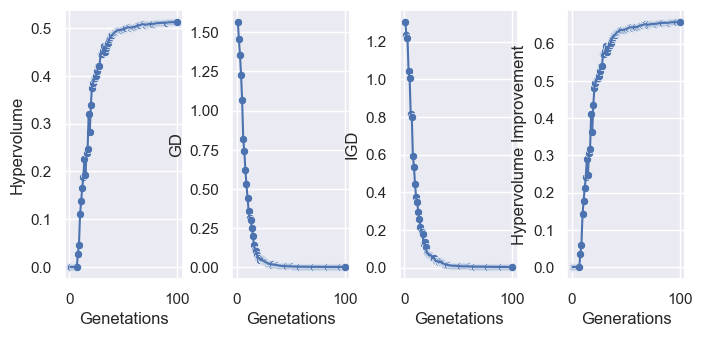

Max values of Hypervolume is 0.5128369943263912 
 , Best value of GD is 0.0028572413436155865 
 , Best value of IGD is 
 0.0038079986411965706 Best value of GD+ is 0.0015355876293117426 , Best value of IGD+ is 0.0023106916532070827


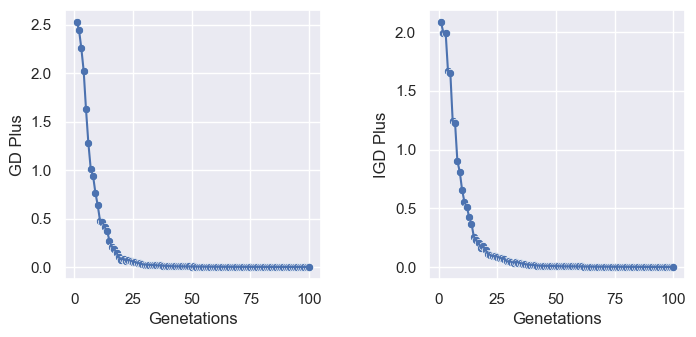

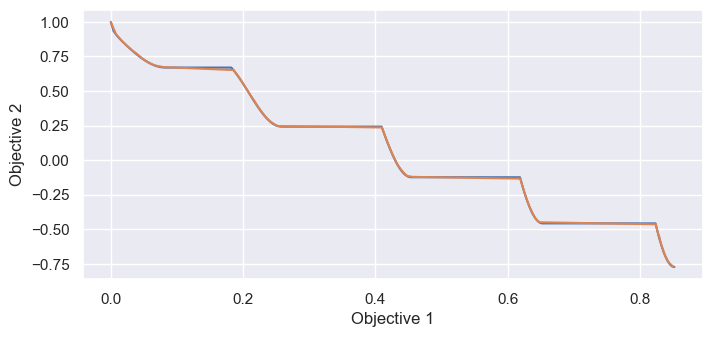

In [11]:
from pymoo.algorithms.moo.nsga3 import NSGA3
from pymoo.util.ref_dirs import get_reference_directions
from pymoo.optimize import minimize
model_list_nsga3 = []
problem = ZDT3()
ref_dirs = get_reference_directions('energy',2,100,seed=1)
algorithm = NSGA3(ref_dirs=ref_dirs)
for i in range(5):
    model_list_nsga3.append(minimize(problem,
               algorithm,
               ('n_gen', 100),
               seed=1,
               save_history = True,
               verbose=True))
data_hv_per_gen = []
data_gd_per_gen = []
data_igd_per_gen = []
data_gdpl_per_gen = []
data_igdpl_per_gen = []
for i in model_list_nsga3:
    data_1 = []
    data_2 = []
    data_3 = []
    data_4 = []
    data_5 = []
    for j in range(100):
        data_1.append(i.history[j].output.hv.value)
        data_2.append(i.history[j].output.gd.value)
        data_3.append(i.history[j].output.igd.value)
        data_4.append(i.history[j].output.gd_plus.value)
        data_5.append(i.history[j].output.igd_plus.value)
    
    data_hv_per_gen.append(data_1)
    data_gd_per_gen.append(data_2)
    data_igd_per_gen.append(data_3)
    data_gdpl_per_gen.append(data_4)
    data_igdpl_per_gen.append(data_5)

data_avg_hyp_improvement = [sum(num) for num in zip(*data_hv_per_gen)]
data_avg_gd_improvement = [sum(num) for num in zip(*data_gd_per_gen)]
data_avg_igd_improvement = [sum(num) for num in zip(*data_igd_per_gen)]
data_avg_gdplus_improvement =[sum(num) for num in zip(*data_gdpl_per_gen)]
data_avg_igdplus_improvement = [sum(num) for num in zip(*data_igdpl_per_gen)]


data_avg_hyp_improvement = [i/5 for i in data_avg_hyp_improvement ]
data_avg_gd_improvement = [i/5 for i in data_avg_gd_improvement ]
data_avg_igd_improvement = [i/5 for i in data_avg_igd_improvement ]
data_avg_gdplus_improvement =[i/5 for i in data_avg_gdplus_improvement ]
data_avg_igdplus_improvement = [i/5 for i in data_avg_igdplus_improvement ]
data_avg_hyp_percent_improvement = [i/Hypervolume_nvar3 for i in data_avg_hyp_improvement ]

import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = [8.00, 3.50]
#plt.rcParams["figure.autolayout"] = True
fig,axes = plt.subplots(1,4)
sns.set_theme(style="darkgrid")
fig.subplots_adjust(hspace=0.725, wspace=0.425)
#fig.suptitle('Performance Plot with n_var=3')
sns.scatterplot(x=list(range(1,101)),y=data_avg_hyp_improvement,ax=axes[0])
sns.lineplot(x=list(range(1,101)),y=data_avg_hyp_improvement,ax=axes[0])
axes[0].set(xlabel='Genetations',ylabel='Hypervolume')

sns.scatterplot(x=list(range(1,101)),y=data_avg_gd_improvement,ax=axes[1])
sns.lineplot(x=list(range(1,101)),y=data_avg_gd_improvement,ax=axes[1])
axes[1].set(xlabel='Genetations',ylabel='GD')

sns.scatterplot(x=list(range(1,101)),y=data_avg_igd_improvement,ax=axes[2])
sns.lineplot(x=list(range(1,101)),y=data_avg_igd_improvement,ax=axes[2])
axes[2].set(xlabel='Genetations',ylabel='IGD')

sns.scatterplot(x=list(range(1,101)),y=data_avg_hyp_percent_improvement,ax=axes[3])
sns.lineplot(x=list(range(1,101)),y=data_avg_hyp_percent_improvement,ax=axes[3])
axes[3].set(xlabel='Generations',ylabel='Hypervolume Improvement')

plt.show()
print('Max values of Hypervolume is {0} \n , Best value of GD is {1} \n , Best value of IGD is \n {2} Best value of GD+ is {3} , Best value of IGD+ is {4}'.format(max(data_avg_hyp_improvement),min(data_avg_gd_improvement),min(data_avg_igd_improvement),min(data_avg_gdplus_improvement),min(data_avg_igdplus_improvement)))
plt.rcParams["figure.figsize"] = [8.00, 3.50]
#plt.rcParams["figure.autolayout"] = True
fig,axes = plt.subplots(1,2)

sns.set_theme(style="darkgrid")
fig.subplots_adjust(hspace=0.425, wspace=0.425)
#fig.suptitle('Performance Plot with n_var=3')
sns.scatterplot(x=list(range(1,101)),y=data_avg_gdplus_improvement,ax=axes[0])
sns.lineplot(x=list(range(1,101)),y=data_avg_gdplus_improvement,ax=axes[0])
axes[0].set(xlabel='Genetations',ylabel='GD Plus')
sns.scatterplot(x=list(range(1,101)),y=data_avg_igdplus_improvement,ax=axes[1])
sns.lineplot(x=list(range(1,101)),y=data_avg_igdplus_improvement,ax=axes[1])
axes[1].set(xlabel='Genetations',ylabel='IGD Plus')
plt.show()


problem = ZDT3()
original_pareto_front = problem.pareto_front()
original_objective_1 = [i[0] for i in original_pareto_front]
original_objective_2 = [i[1] for i in original_pareto_front]
optimized_result = model_list_nsga3[0]
optimized_objectives  = optimized_result.F
optimized_objective_1 = [i[0] for i in optimized_objectives]
optimized_objective_2 = [i[1] for i in optimized_objectives]
sns.lineplot(x=original_objective_1,y=original_objective_2)
sns.lineplot(x=optimized_objective_1,y=optimized_objective_2)
plt.xlabel("Objective 1")
plt.ylabel("Objective 2")
plt.show()